<a href="https://www.kaggle.com/code/sai10py/credit-score-2?scriptVersionId=249660306" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [9]:
import pandas as pd
import numpy as np
import joblib

In [10]:
loan_data = pd.read_csv("/kaggle/input/creditsakhi/loan_data.csv")
loan_data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBClassifier, XGBRegressor

In [12]:
data_encoded = loan_data.copy()
encoders = {}
for col in data_encoded.columns:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
    encoders[col] = le

In [13]:
imputer = KNNImputer(n_neighbors=3)
data_imputed = pd.DataFrame(imputer.fit_transform(data_encoded), columns=data_encoded.columns)

In [14]:
X_score = data_imputed.drop(columns=['credit_score', 'loan_status'])
y_score = data_imputed['credit_score']

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_score, y_score, test_size=0.2, random_state=42)

reg_model = XGBRegressor()
reg_model.fit(X_train_s, y_train_s)

score_preds = reg_model.predict(X_test_s)

mse = mean_squared_error(y_test_s, score_preds)
print(f"Mean Squared Error (Credit Score): {mse:.2f}")

os.makedirs("models", exist_ok=True)
reg_model.save_model("xgb_credit_model.json")

Mean Squared Error (Credit Score): 2452.58


In [15]:
data_with_pred_score = X_score.copy()
data_with_pred_score['predicted_credit_score'] = reg_model.predict(X_score)

# Now predict loan_status using predicted credit score
y_class = data_imputed['loan_status']

Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.97      0.96      6990
         1.0       0.88      0.80      0.84      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.88      0.90      9000
weighted avg       0.93      0.93      0.93      9000



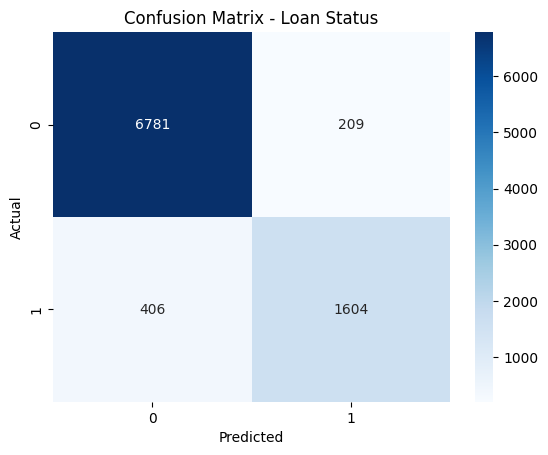

In [16]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(data_with_pred_score, y_class, test_size=0.2, random_state=42)

clf_model = XGBClassifier()
clf_model.fit(X_train_c, y_train_c)

loan_preds = clf_model.predict(X_test_c)

print("Classification Report:\n", classification_report(y_test_c, loan_preds))

os.makedirs("models", exist_ok=True)
clf_model.save_model("xgb_loan_approval_model.json")

cm = confusion_matrix(y_test_c, loan_preds)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Loan Status")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

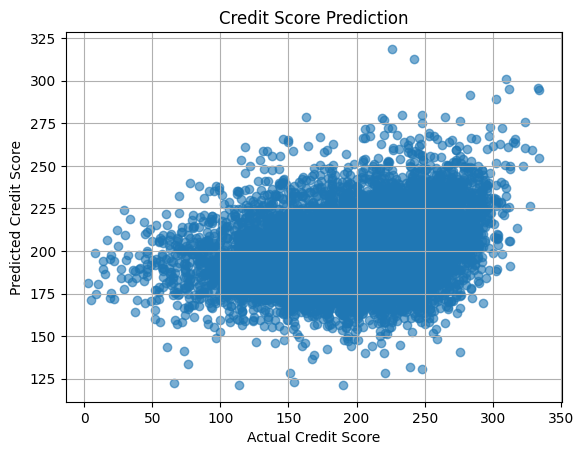

In [17]:
plt.scatter(y_test_s, score_preds, alpha=0.6)
plt.xlabel("Actual Credit Score")
plt.ylabel("Predicted Credit Score")
plt.title("Credit Score Prediction")
plt.grid(True)
plt.show()